In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 14
sns.set (style = 'white', context = 'talk')

In [60]:
#https://www.quandl.com/data/FRED/documentation/documentation
#FRED/DFF is the db designation for the federal funds rate
url = 'https://www.quandl.com/api/v3/datasets/FRED/DFF.csv?start_date=2008-12-31&end_date=2015-12-31&collapse=quarterly&order=asc&api_key=8svAK6ywjVwkSHtiu534'

In [61]:
#Define columns, read in csv file, and parse dates
dff_cols = ['Date', 'Interest Rate']
dff = pd.read_csv(url, header=0, names=dff_cols, parse_dates=True, na_filter=False)
dff.rename(columns={'Interest Rate':'Interest_Rate'}, inplace=True)

In [62]:
dff.head(2)

,Date,Interest_Rate
0,2008-12-31,0.14
1,2009-03-31,0.16


In [63]:
print dff.shape
print type(dff.Date)

(29, 2)
<class 'pandas.core.series.Series'>


In [64]:
#Redefine Date into an integer
dff['datetime'] = pd.to_datetime(dff.Date)
dff['year'] = dff.datetime.dt.year
dff['quarter'] = dff.datetime.dt.quarter

In [65]:
#dff.plot(kind='scatter', x='Date', y='Interest_Rate', alpha=0.2)
#dff.plot(kind='scatter')
#dff.plot(x='datetime', y='Interest_Rate')

In [66]:
#Define and read in buybacks data set
buybacks_url = "/Users/scottshagory/Desktop/Project/SP_500_Buyback.csv"
buybacks = pd.read_csv (buybacks_url, index_col=None, parse_dates=True)
buybacks.drop(['VALUE','BUYBACK .1','& BUYBACKS'], axis=1, inplace=True)
buybacks.shape

(28, 7)

In [67]:
buybacks.dtypes

DATE           object
EARNINGS       object
EARNINGS.1     object
DIVIDENDS     float64
BUYBACKS      float64
DIVIDEND       object
BUYBACK        object
dtype: object

In [68]:
#Redefine date parameter into useable pandas form
buybacks['datetime'] = pd.to_datetime(buybacks.DATE)
buybacks['year'] = buybacks.datetime.dt.year
buybacks['quarter'] = buybacks.datetime.dt.quarter
buybacks.shape

(28, 10)

In [69]:
buybacks.head(2)

,DATE,EARNINGS,EARNINGS.1,DIVIDENDS,BUYBACKS,DIVIDEND,BUYBACK,datetime,year,quarter
0,9/30/2015,$224.23,$205.90,95.07,150.58,2.22%,3.30%,2015-09-30,2015,3
1,6/30/2015,$230.84,$201.35,94.45,131.56,2.03%,3.04%,2015-06-30,2015,2


In [70]:
#Merging Fed Interest Rate and S&P500 Dataframes 
buybacks_dff = pd.merge(buybacks,dff, on=['quarter','year'])

In [71]:
print buybacks.shape
print dff.shape
print buybacks_dff.shape

(28, 10)
(29, 5)
(28, 13)


In [72]:
buybacks_dff.head(2)

,DATE,EARNINGS,EARNINGS.1,DIVIDENDS,BUYBACKS,DIVIDEND,BUYBACK,datetime_x,year,quarter,Date,Interest_Rate,datetime_y
0,9/30/2015,$224.23,$205.90,95.07,150.58,2.22%,3.30%,2015-09-30,2015,3,2015-09-30,0.07,2015-09-30
1,6/30/2015,$230.84,$201.35,94.45,131.56,2.03%,3.04%,2015-06-30,2015,2,2015-06-30,0.08,2015-06-30


In [73]:
#Tried a number of steps to remove $ signs, but wasn't successful.  Ended up removing them from .csv file.
#Convert dollar sign ($) in Buybacks column to float type.
#Including "-" in 2nd line to deal w/potential negative numbers
#(buybacks_dff['BUYBACKS'].replace( '[\$,)]','',regex=True).astype(float))
  #                       .replace( '[(]','-',   regex=True).astype(float))

In [74]:
buybacks_dff.head(2)

,DATE,EARNINGS,EARNINGS.1,DIVIDENDS,BUYBACKS,DIVIDEND,BUYBACK,datetime_x,year,quarter,Date,Interest_Rate,datetime_y
0,9/30/2015,$224.23,$205.90,95.07,150.58,2.22%,3.30%,2015-09-30,2015,3,2015-09-30,0.07,2015-09-30
1,6/30/2015,$230.84,$201.35,94.45,131.56,2.03%,3.04%,2015-06-30,2015,2,2015-06-30,0.08,2015-06-30


In [75]:
#Building linear regression model for S&P500 buybacks
feature_cols = ['Interest_Rate']
X = buybacks_dff[feature_cols]
y = buybacks_dff.BUYBACKS
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
print linreg.intercept_
print linreg.coef_

150.898336112
[-590.21649846]


In [77]:
#If interest rates rose to .50
print linreg.intercept_ + linreg.coef_*.25
print linreg.intercept_ + linreg.coef_*.50

[ 3.3442115]
[-144.20991312]


In [78]:
#Looking at how rising interests rates would affect S&P500 Buybacks
print linreg.predict(.25)
print linreg.predict(.50)
print linreg.predict(.75)
print linreg.predict(1.00)

[ 3.3442115]
[-144.20991312]
[-291.76403774]
[-439.31816235]


In [79]:
#Calculating predicted regression sum differences per change in X (interest rates)
print 3.3442115 - (-144.20991312)
print -144.20991312 - (-291.76403774)
print -291.76403774 - (-439.31816235)

147.55412462
147.55412462
147.55412461


In [80]:
#Comparing scores w/cross validation and mean squared error for interest rates and S&P500 buybacks
lm = LinearRegression()
scores = -cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')
print mse_scores
print mse_scores.mean()

[  4.98379559e+00   3.59070690e+01   4.77380439e+00   2.30966085e-06
   1.45111494e+00   4.57200193e-01   1.82290710e+01   1.19843708e+00
   1.07454124e+01   7.90693123e+00]
8.56528381109


In [81]:
#Comparing MSE w/RMSE for interest rates and S&P500 buybacks
rmse_scores = np.sqrt(mse_scores)
print rmse_scores
print rmse_scores.mean()

[  2.23244162e+00   5.99225074e+00   2.18490375e+00   1.51975684e-03
   1.20462232e+00   6.76165803e-01   4.26955162e+00   1.09473151e+00
   3.27801959e+00   2.81192661e+00]
2.37461333119


In [82]:
#Creating Dataframe of Predicted Regressions Sums
regression_SP = pd.DataFrame({'Potential_SP_Share_Buybacks':[3.3442115, -144.20991312, -291.76403774, -439.31816235]})
regression_SP['Potential_SP_Interest_Rates'] = [.25, .50, .75, 1.00]
regression_SP.head()

,Potential_SP_Share_Buybacks,Potential_SP_Interest_Rates
0,3.344212,0.25
1,-144.209913,0.50
2,-291.764038,0.75
3,-439.318162,1.00


In [83]:
regression_SP.dtypes

Potential_SP_Share_Buybacks    float64
Potential_SP_Interest_Rates    float64
dtype: object

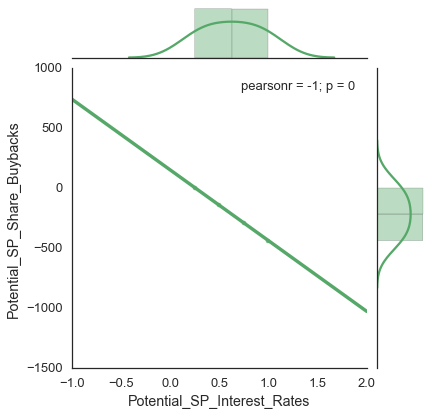

In [84]:
sns.jointplot("Potential_SP_Interest_Rates", "Potential_SP_Share_Buybacks", regression_SP, size=6, kind="reg", color="g")
sns.set(color_codes=True)

In [85]:
#Define and read in IBM data set
ibm_url = "/Users/scottshagory/Desktop/Project/IBM_Buyback.csv"
ibm = pd.read_csv (ibm_url, index_col=None)
ibm.drop(['Action Type', 'Security ID'], axis=1, inplace=True)
ibm.drop(['Announce/Declared Date'], axis=1, inplace=True)
ibm.rename(columns = {'Effective Date':'datetime'},inplace=True)
ibm.shape

(37, 2)

In [86]:
#Redefine date parameter into useable pandas form
ibm['datetime'] = pd.to_datetime(ibm.datetime)
ibm['year'] = ibm.datetime.dt.year
ibm['quarter'] = ibm.datetime.dt.quarter
ibm.shape

(37, 4)

In [87]:
ibm.head(2)

,datetime,Billions_Bought,year,quarter
0,2015-10-27,4,2015,4
1,2014-10-28,5,2014,4


In [88]:
ibm.tail(2)

,datetime,Billions_Bought,year,quarter
35,1995-07-25,2.5,1995,3
36,1995-01-31,2.5,1995,1


In [89]:
ibm.dtypes

datetime           datetime64[ns]
Billions_Bought           float64
year                        int64
quarter                     int64
dtype: object

In [90]:
#Merging Fed Interest Rate and IBM share buyback Dataframes
ibm_dff = pd.merge(ibm,dff, on=['quarter','year'])

In [91]:
print ibm.shape
print dff.shape
print ibm_dff.shape

(37, 4)
(29, 5)
(12, 7)


In [92]:
ibm_dff.head()

,datetime_x,Billions_Bought,year,quarter,Date,Interest_Rate,datetime_y
0,2015-10-27,4,2015,4,2015-12-31,0.20,2015-12-31
1,2014-10-28,5,2014,4,2014-12-31,0.06,2014-12-31
2,2013-10-29,15,2013,4,2013-12-31,0.07,2013-12-31
3,2013-04-30,5,2013,2,2013-06-30,0.07,2013-06-30
4,2012-10-30,5,2012,4,2012-12-31,0.09,2012-12-31


In [93]:
#Building linear regression model for S&P500 buybacks
feature_cols = ['Interest_Rate']
X = ibm_dff[feature_cols]
y = ibm_dff.Billions_Bought
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
print linreg.intercept_
print linreg.coef_

8.78359592215
[-19.83317887]


In [95]:
#If interest rates rose to .50
print linreg.intercept_ + linreg.coef_*.25
print linreg.intercept_ + linreg.coef_*.50

[ 3.8253012]
[-1.13299351]


In [96]:
#Looking at how rising interests rates would affect IBM buying back its shares
print linreg.predict(.25)
print linreg.predict(.50)
print linreg.predict(.75)
print linreg.predict(1.00)

[ 3.8253012]
[-1.13299351]
[-6.09128823]
[-11.04958295]


In [97]:
#Calculating predicted regression sum differences per change in X (interest rates)
print 3.8253012 - (-1.13299351)
print -1.13299351 - (-6.09128823)
print -6.09128823 - (-11.04958295)

4.95829471
4.95829472
4.95829472


In [98]:
#Comparing scores w/cross validation and mean squared error for interest rates and IBM buybacks
from sklearn.cross_validation import cross_val_score
lm = LinearRegression()
scores = -cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')
print mse_scores
print mse_scores.mean()

[  4.98379559e+00   3.59070690e+01   4.77380439e+00   2.30966085e-06
   1.45111494e+00   4.57200193e-01   1.82290710e+01   1.19843708e+00
   1.07454124e+01   7.90693123e+00]
8.56528381109


In [99]:
#Comparing MSE w/RMSE for interest rates and IBM buybacks
rmse_scores = np.sqrt(mse_scores)
print rmse_scores
print rmse_scores.mean()

[  2.23244162e+00   5.99225074e+00   2.18490375e+00   1.51975684e-03
   1.20462232e+00   6.76165803e-01   4.26955162e+00   1.09473151e+00
   3.27801959e+00   2.81192661e+00]
2.37461333119


In [100]:
#Creating Dataframe of Predicted Regressions Sums (Standard linear regression)
regression_IBM = pd.DataFrame({'Potential_IBM_Share_Buybacks':[3.8253012, -1.13299351, -6.09128823, -11.04958295]})
regression_IBM['Potential_IBM_Interest_Rates'] = [.25, .50, .75, 1.00]
regression_IBM.head()

,Potential_IBM_Share_Buybacks,Potential_IBM_Interest_Rates
0,3.825301,0.25
1,-1.132994,0.50
2,-6.091288,0.75
3,-11.049583,1.00


In [101]:
regression_IBM.dtypes

Potential_IBM_Share_Buybacks    float64
Potential_IBM_Interest_Rates    float64
dtype: object

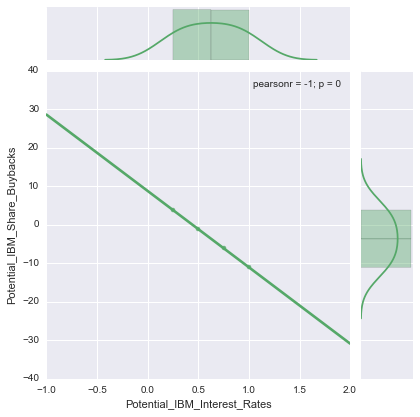

In [102]:
sns.jointplot("Potential_IBM_Interest_Rates", "Potential_IBM_Share_Buybacks", regression_IBM, size=6, kind="reg", color="g")
sns.set(color_codes=True)

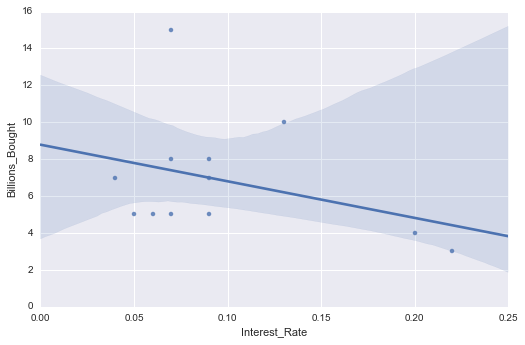

In [103]:
#Back to Standard Regression Work
# Seaborn scatter plot with regression line
sns.lmplot(x='Interest_Rate', y='Billions_Bought', data=ibm_dff, aspect=1.5)

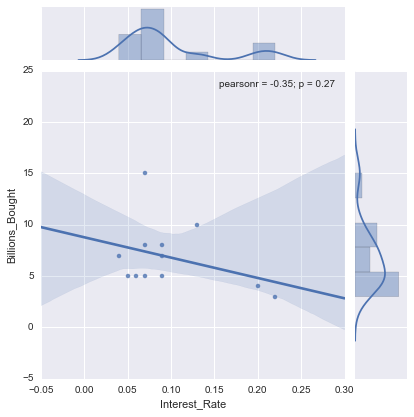

In [104]:
sns.jointplot("Interest_Rate", "Billions_Bought", ibm_dff, kind="reg")